In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")
data = data.reset_index()

In [3]:
data.head(10)

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.shape

(150, 7)

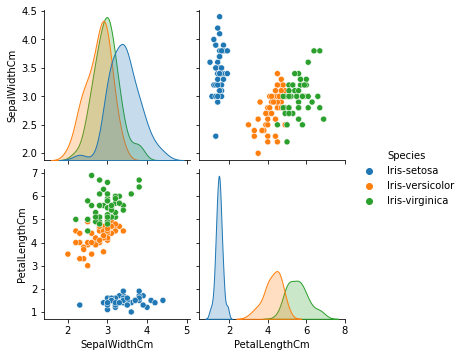

In [5]:
sns.pairplot( data=data, vars=('SepalWidthCm','PetalLengthCm'), hue='Species' )

In [6]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],['0','1','2'])
data = pd.concat([data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], target], axis=1)

In [7]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [8]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()
for i in range(len(data)):
  c= random.choices(population=[0,1],weights=[70,30],k=1)
  if c[0]==0:
    train_data=train_data.append(data.loc[i])
  else:
    test_data=test_data.append(data.loc[i])
train_data['Species'] = train_data['Species'].astype(int)
test_data['Species'] = test_data['Species'].astype(int)

In [9]:
test_data.head(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
6,4.6,3.4,1.4,0.3,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
21,5.1,3.7,1.5,0.4,0
24,4.8,3.4,1.9,0.2,0
26,5.0,3.4,1.6,0.4,0
29,4.7,3.2,1.6,0.2,0


In [10]:
train_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
7,5.0,3.4,1.5,0.2,0
9,4.9,3.1,1.5,0.1,0
11,4.8,3.4,1.6,0.2,0
12,4.8,3.0,1.4,0.1,0
13,4.3,3.0,1.1,0.1,0
14,5.8,4.0,1.2,0.2,0


In [11]:
trainX = train_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
trainY=train_data.Species
testX= test_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
testY =test_data.Species
clf = MLPClassifier(solver='lbfgs',epsilon=0.07, max_iter=150)
clf.fit(trainX, trainY)
prediction = clf.predict(testX)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [12]:
perceptron_accuracy = metrics.accuracy_score(prediction,testY)
print('Accuracy :',perceptron_accuracy)

Accuracy : 0.9545454545454546


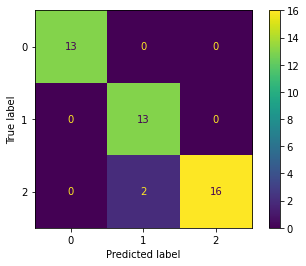

In [13]:
cm = metrics.confusion_matrix(testY, prediction, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()


In [15]:
clf = MLPClassifier(solver='lbfgs',learning_rate='constant', learning_rate_init=0.7,epsilon=0.07, max_iter=1500)
clf.fit(trainX, trainY)


MLPClassifier(epsilon=0.07, learning_rate_init=0.7, max_iter=1500,
              solver='lbfgs')

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [17]:
x_train = np.array(trainX)
model = Sequential()
model.add(Dense(4, input_dim=4 ,activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
y_test_cat=to_categorical(testY)
y_train_cat=to_categorical(trainY)
hist = model.fit(x_train, y_train_cat, epochs=150, batch_size=4)

Epoch 1/150
27/27 [==============================] - 1s 2ms/step - loss: 0.7446 - accuracy: 0.3019 
Epoch 2/150
27/27 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.3019
Epoch 3/150
27/27 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.3019
Epoch 4/150
27/27 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.3019
Epoch 5/150
27/27 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.3019
Epoch 6/150
27/27 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.3019
Epoch 7/150
27/27 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.3019
Epoch 8/150
27/27 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.3019
Epoch 9/150
27/27 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.3019
Epoch 10/150
27/27 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.3019
Epoch 11

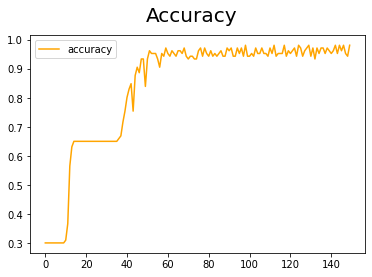

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
_, accuracy = model.evaluate(trainX, y_train_cat)
print('Accuracy: %.2f' % (accuracy*100) )

4/4 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.9811
Accuracy: 98.11
